In [1]:
# importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [3]:
data.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.shape

(344, 7)

In [5]:
data.dropna() 

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
# Scaling
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g']])
data_s = pd.DataFrame(data_scaled, columns=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g'])

In [8]:
labelencoder_X = LabelEncoder()

In [9]:
data["species_short"] = labelencoder_X.fit_transform(data["species_short"])
data["island"] = labelencoder_X.fit_transform(data["island"])
data["sex"] = labelencoder_X.fit_transform(data["sex"])

In [10]:
data_s_all = pd.concat([data[['species_short', 'island', 'sex']], data_s], axis=1)
data_s_all

,species_short,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,2,0.254545,0.666667,0.152542,0.291667
1,0,2,1,0.269091,0.511905,0.237288,0.305556
2,0,2,1,0.298182,0.583333,0.389831,0.152778
3,0,2,3,NaN,NaN,NaN,NaN
4,0,2,1,0.167273,0.738095,0.355932,0.208333
...,...,...,...,...,...,...,...
339,2,0,3,NaN,NaN,NaN,NaN
340,2,0,1,0.534545,0.142857,0.728814,0.597222
341,2,0,2,0.665455,0.309524,0.847458,0.847222
342,2,0,1,0.476364,0.202381,0.677966,0.694444


In [34]:
data_s_all = data_s_all.dropna(subset=['flipper_length_mm'])

In [35]:
data_s_all.shape

(342, 7)

In [25]:
data_s_all[data_s_all['flipper_length_mm'] == np.nan]

,species_short,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g


In [36]:
data_x = torch.tensor(data_s_all[['species_short', 'island']].values.astype(np.float32))
data_y = torch.tensor(data_s_all[['sex']].values.astype(np.float32))

In [37]:
print(data_x.size())
print(data_y.size())

torch.Size([342, 2])
torch.Size([342, 1])


In [38]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net3 = torch.nn.Sequential(torch.nn.Linear(2,1),
                                 torch.nn.Sigmoid());
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net3.parameters(), lr=learning_rate)

for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net3.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-38-27edbc55cf72>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 1.3520065546035767
Loss: 1.0894607305526733
Loss: 0.9205177426338196
Loss: 0.8111299872398376
Loss: 0.7408912777900696
Loss: 0.695387065410614
Loss: 0.6654275059700012
Loss: 0.6453263163566589
Loss: 0.6315618753433228
Loss: 0.6219315528869629


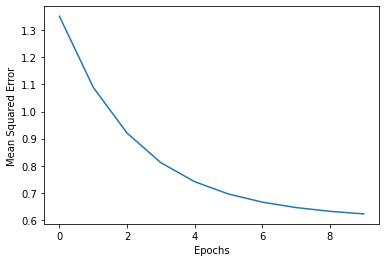

In [39]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [40]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 10
learning_rate = 0.001
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(torch.nn.Linear(2,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.Sigmoid()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x, data_y):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-40-a2c277292e44>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/10 [00:00<?, ?epoch/s]

Loss: 0.9831417798995972
Loss: 0.7048236131668091
Loss: 0.6191732883453369
Loss: 0.5967535376548767
Loss: 0.5905868411064148
Loss: 0.5887458920478821
Loss: 0.5881320834159851
Loss: 0.5879009366035461
Loss: 0.5878037810325623
Loss: 0.5877597332000732


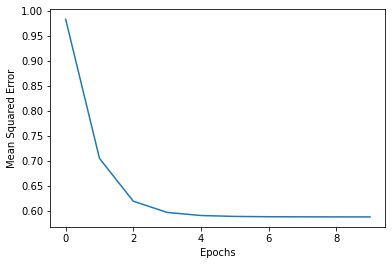

In [41]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [42]:
data_x_4 = torch.tensor(data_s_all[['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm']].values.astype(np.float32))
data_y_4 = torch.tensor(data_s_all[['flipper_length_mm']].values.astype(np.float32))


In [43]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 50
learning_rate = 0.01
loss_set = {}



for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x_4, data_y_4):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-43-5e247bc1a06f>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/50 [00:00<?, ?epoch/s]

Loss: 0.042427387088537216
Loss: 0.018972327932715416
Loss: 0.012529738247394562
Loss: 0.011620260775089264
Loss: 0.010876423679292202


In [ ]:
species_short	island	sex	culmen_length_mm	culmen_depth_mm	flipper_length_mm	body_mass_g